# Homework 2

## James Jefferies

Instructions: 

 1. Please replace "Yourname" above, and in the title / filename of this notebook. 
 2. Import all the libraries you end up using in the cell below. Please only use those libraries which we have used in class (i.e. nltk, collections, pandas, etc.). 
 3. Complete all the exercises, replacing "enter code here" with your code, and "enter markdown here" with your markdown. Annotate your code with markdown cells, to explain what you're doing, and interpret your results.  
 4. From the Kernel menu, select "restart and run all." This will help me to see the output of your answers. 
 5. Email me your completed notebook: jonathan.reeve@columbia.edu


In [2]:
# Import all your libraries here. 
import nltk
import pandas
import collections
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### 1. Write a function that takes a text string as input, lowercases it, and computes its type / token ratio. 

In [3]:
def typeTokenRatio(text):
    lowerText = text.lower()
    tokens = nltk.word_tokenize(lowerText)
    
    return len(set(tokens)) / len(tokens)
    
typeTokenRatio("the the the the the that's all folks")

0.5555555555555556

### 2. Use your function from #1 to compute the type/token ratios for two or three texts, of at least 1000 words each, and which contain the same number of words in each. In the markdown cell, write what you notice about those ratios. 

In [4]:
# Iris Murdoch's first novel
underTheNet = open('../Readings/under-the-net.txt').read()

# Her 13th Novel
aFairlyHonourableDefeat = open('../Readings/fairly-honourable-defeat.txt', encoding='latin2').read()

# Her 4th Novel
theBell = open('../Readings/bell.txt', encoding='latin2').read()

# Booker prize winning novel, her 19th Novel
theSeaTheSea = open('../Readings/the-sea-the-sea-novel.txt', encoding='latin2').read()

# Penultimate novel
theMessageToThePlanet = open('../Readings/message-to-the-planet.txt', encoding='latin2').read()

# Her final novel and 26th Novel
jacksonsDilemma = open('../Readings/jackson-s-dilema.txt', encoding='latin2').read()

# Sorry, got carried away and ended up with using 6!
textDict = { 
    'Under the Net (1954)': underTheNet, 
    'The Bell (1958)': theBell,
    'A Fairly Honourable Defeat (1970)': aFairlyHonourableDefeat,
    'The Sea, The Sea (1978)': theSeaTheSea, 
    'The Message To The Planet (1989)': theMessageToThePlanet,
    "Jackson's Dilemma (1995)": jacksonsDilemma 
}

def removePunctuation(text):
    """Remove punctuation"""
    for punct in "!@#$%^&*():;-’“”,\n\xa0.?\"\'–":
        text = text.replace(punct, ' ')
    return text

def preProcessTexts(text):
    """Lower case text and remove punctuation"""
    lowerText = text.lower()
    return removePunctuation(lowerText)

# Use dictionary comprehension to create dictionaries
preProcessedTextDict = { name: preProcessTexts(text) for name, text in textDict.items() }  
tokenDict = { name: nltk.word_tokenize(text) for name, text in preProcessedTextDict.items() }

# Helper function to output neatly
def formatOutput(name, value):
    """Neat output of name and value"""
    #print(name + (50 - len(name)) * ' ' + str(value))
    print(f"{value} {name}")
    
# TTR function
def typeTokenRatio(dictionary):
    """Calculate the type token ratios for a dictionary of texts"""
    for name, entry in dictionary.items():
        numTokens = len(entry)
        numTypes = len(set(entry))  
        formatOutput(name, numTypes/numTokens)  
    
print("These are the word counts for the novels\n")
for name, entry in tokenDict.items():
    formatOutput(name, len(entry))     
    
print("\n\nThese are the type/token ratios without the novels being truncated to the same length\n")
typeTokenRatio(tokenDict)     
    
# Find the minimum number of words by creating a list of word counts
minimumWords = min([ len(text) for name, text in tokenDict.items()])

truncatedTokenDict = { name: text[:minimumWords] for name, text in tokenDict.items() }

print("\n\nThese are the type/token ratios with the novels being truncated to the same length\n")
typeTokenRatio(truncatedTokenDict)    


These are the word counts for the novels

101480 Under the Net (1954)
118176 The Bell (1958)
153611 A Fairly Honourable Defeat (1970)
207291 The Sea, The Sea (1978)
256988 The Message To The Planet (1989)
91867 Jackson's Dilemma (1995)


These are the type/token ratios without the novels being truncated to the same length

0.08112928655892787 Under the Net (1954)
0.07417749796913078 The Bell (1958)
0.06093313629883276 A Fairly Honourable Defeat (1970)
0.05727696812693267 The Sea, The Sea (1978)
0.0455663299453671 The Message To The Planet (1989)
0.06918697682519294 Jackson's Dilemma (1995)


These are the type/token ratios with the novels being truncated to the same length

0.08583060293685436 Under the Net (1954)
0.08452436674758074 The Bell (1958)
0.0810846114491602 A Fairly Honourable Defeat (1970)
0.09101200648763974 The Sea, The Sea (1978)
0.08352291900247097 The Message To The Planet (1989)
0.06918697682519294 Jackson's Dilemma (1995)



### Type/Token ratios for six Iris Murdoch novels

So, after truncating the text of the first five novels to have the same number of tokens (after punctuation has been removed) as the last novel, which has the least tokens. I've calculated the type/token ratios.

I *think* that what I see from looking at these novels is that the vocabulary used in Under The Net (1954) is quite varied, but by The Sea, The Sea, a novel from the height of her powers, she has a greater vocabulary being used in her writing. However, by the time we get to her final novel, one where she struggled with the onset of her Alzheimers, either she was using a smaller vocabulary or repeating many words. It will be interesting to study this further!


### 3. Write a function that takes a text string as input, then computes the average number of words per sentence, for that text. 

In [5]:
# Enter code here. 

def averageWordsPerSentence(text):
    sentences = nltk.sent_tokenize(text)
    sentencesWithoutPunctuation = [removePunctuation(sentence) for sentence in sentences]

    sentencesTokenised = [nltk.word_tokenize(sentence) for sentence in sentencesWithoutPunctuation]

    sentenceLengths = [len(sentence) for sentence in sentencesTokenised]
    totalSentenceLength = sum(sentenceLengths)

    return totalSentenceLength / len(sentencesWithoutPunctuation)
    
    
example_string = "Here we go. This one has four. This one might have five. This one deffo has exactly six."

averageWordsPerSentence(example_string)

4.5

### 4. Use your function to calculate the average sentence length, in words, for all the narrators we have read so far (Betteredge, Clack, Bruff, Blake). Then, in a markdown cell, describe what you think this might indicate.

In [6]:
# Enter code here. 
moonstone = open('../Readings/Content/texts/moonstone.md', encoding="utf8").read()

moonstoneParts = moonstone.split('##')

betteredge = moonstoneParts[5:29]
betteredgeString = " ".join(betteredge)
clack = moonstoneParts[31:39]
clackString = " ".join(clack)
bruff = moonstoneParts[40:43]
bruffString = " ".join(bruff)
# Starts 44
blake = moonstoneParts[44:53]
blakeString = " ".join(blake)

formatOutput("Betteredge average words per sentence:", averageWordsPerSentence(betteredgeString))
formatOutput("Clack average words per sentence:", averageWordsPerSentence(clackString))
formatOutput("Bruff average words per sentence:", averageWordsPerSentence(bruffString))
formatOutput("Blake average words per sentence:", averageWordsPerSentence(blakeString))

21.249802994483847 Betteredge average words per sentence:
18.579355608591886 Clack average words per sentence:
23.07912087912088 Bruff average words per sentence:
20.020576131687243 Blake average words per sentence:


I usually think that wordy sentences are often a sign of education, or of trying to show education. You would expect Bruff, as a solicitor to be better educated than Betteredge, a house servant who had some education, as he acted as bailiff and would have needed to do paperwork. Poor Miss Clack though, what kind of education did she have? You would have thought better than a house servant, but maybe she prefers to leave the verbosity to her tracts!

Initially I hadn't added Blake, but now he's in there too, he uses less words than Betteredge and Bruff. Maybe too, Betteredge rambles a bit (and gets distracted from his purposes). I'd have thought Blake's might have been higher. Maybe he's concise with his speech - Blake and Clack are the youngest two of the four as well, maybe that makes a difference!

### 5. Choose a motif that you notice in _The Moonstone_. Choose around 3-5 words (or tokens, stems, or lemmas) that you think represent this motif. Create a plot to show the positions of these words in the narrative time of _The Moonstone_ (at least the amount that we've read of it). Then create concordances for a few of these words. Finally, in 2-3 paragraphs of well-formatted markdown, describe what this tells you about how the motif operates in the novel. 

In [7]:
# examples -  drugs, which you could model with words like opium, tobacco, pipe, brandy, and so on
# be documents, which you might model with words like journal, letter, telegram, 
# Diamond - diamond, moon, stone

# This cell is just setting up the data

moonstone = open('../Readings/Content/texts/moonstone.md', encoding="utf8").read()

moonstoneParts = moonstone.split('##')

betteredge = moonstoneParts[5:29]
betteredgeString = " ".join(betteredge)
clack = moonstoneParts[31:39]
clackString = " ".join(clack)
bruff = moonstoneParts[40:43]
bruffString = " ".join(bruff)
franklin = moonstoneParts[44:53]
franklinString = " ".join(franklin)

moonstoneSoFar = betteredgeString + clackString + bruffString + franklinString

moonstoneSoFar = moonstoneSoFar.lower()

moonstoneSoFarTokens = nltk.word_tokenize(moonstoneSoFar)
moonstoneSoFarText = nltk.Text(moonstoneSoFarTokens, name="Moonstone so far")

Here we try using the various drugs and drug related words. I looked up why Opium appeared early on and it was said the Colonel used it. If we used the whole of the text (after Franklin's narration) then I suspect we'd get Laudanum and Tincture in there too. Cigar appears regularly, but infrequently. Pipe and brandy appear more when Betteredge is either narrating or around.

I think it was Murthwaite who smoked a cheroot at the dinner party. 

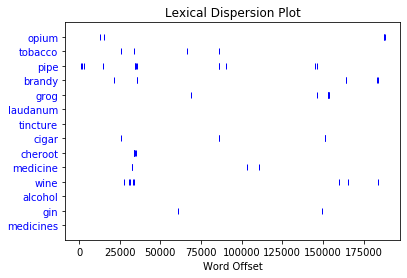

In [8]:
moonstoneSoFarText.dispersion_plot(['opium', 'tobacco', 'pipe', 'brandy', 'grog','laudanum','tincture', 'cigar', 'cheroot','medicine','wine', 'alcohol','gin','medicines'])

Here we try using the correspondence/writing words. Will doesn't really work here because it's used all of the time without it actually meaning the document, maybe it would be better if we did it case sensitive to look for Will rather than all wills. Tract appears most during Miss Clack's section. Book appears quite frequently, as does letter, especially later on when we have the discovery of Rosanna's letters.

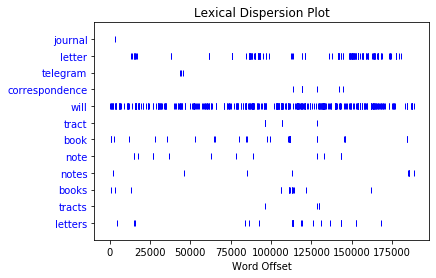

In [9]:
moonstoneSoFarText.dispersion_plot(['journal', 'letter', 'telegram', 'correspondence', 'will', 'tract', 'book','note', 'notes','books','tracts','letters'])


Looking at Moon (including the moon in the sky) diamond and stone - Wow, the moon on it's own appears a few times, but diamond and moonstone make up so many words of the book!

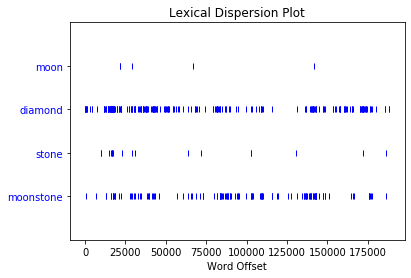

In [10]:
moonstoneSoFarText.dispersion_plot(['moon', 'diamond', 'stone','moonstone'])


Rosanna is so important in the first narration and then again later on when she appears from the dead in Franlkin's. Very clear her roles in the novel at this point. Rose appears continuously and frequently throughout all the narrations so far and has to be a key motif for the novel. The gardener has more of a role than you might remember too.

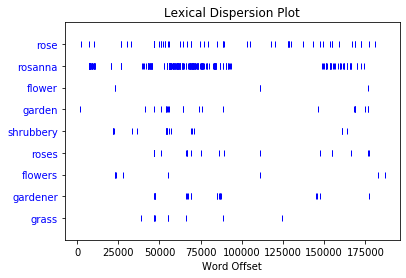

In [11]:
moonstoneSoFarText.dispersion_plot(['rose', 'rosanna', 'flower','garden','shrubbery','roses','flowers','gardener','grass'])


From this plot, mystery appears continously and quite frequently, but not as often as I would have thought

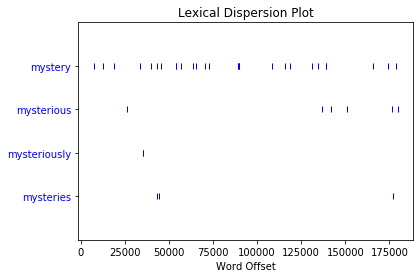

In [12]:
moonstoneSoFarText.dispersion_plot(['mystery', 'mysterious', 'mysteriously','mysteries'])

Here are some dispersion and concordances on some of these crime words. Lost appears a lot, but when looking at the concordance, it's used in quite a few different contexts. It's interesting though as it's not only the diamond which is missing in the novel. Characters like Ezra Jennings have lost someone special and experience their own anguish because of that. Betteredge has lost his wife (but isn't too bothered!). Franklin loses Rachel and vice-versa for a while.

Thief is interesting because there is a chunk in the middle where it doesn't appear, or maybe cross Miss Clack's lips! The dispersion plot would be especially interesting if we could have a vertical line to show where the narrations start and finish. Maybe that's something we can learn how to do later?

Stolen is similar too, missing for a chunk in the middle.

I think I maybe should have done some stemming on these words so that Thief and Thieves for example would be covered together than having to remember to do them separately.



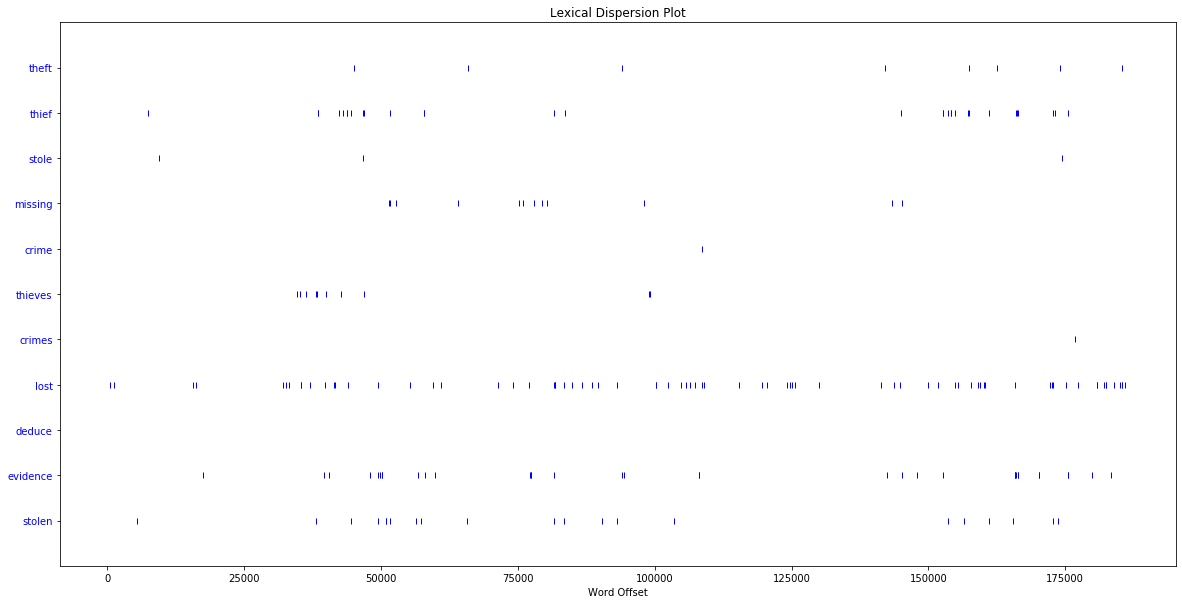



Displaying 8 of 8 matches:
ed , sentenced , and transported for theft . the other women took to their bibl
r suspecting rosanna spearman of the theft . there is the whole case in a nutsh
rstood ) , on suspicion of attempted theft ; and he felt by no means sure that 
 dismissed on suspicion of attempted theft , and whom he also distrusted as pos
ve been ashamed of suspecting him of theft , almost as soon as the suspicion ha
 secret , and your accomplice in the theft which your money-troubles had tempte
ou that i knew you had committed the theft . and all the return you made , was 
wledging that i was suspected of the theft of the diamond . strongly as ezra je


Displaying 31 of 31 matches:
s , that rosanna spearman had been a thief , and not being of the sort that get
tional explanation . but how had the thief contrived to make his escape from th
elves . the dogs , too ? suppose the thief had got away by dropping from one of
most as good as told her she was the thief ! i could scarcel

In [13]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

moonstoneSoFarText.dispersion_plot(['theft','thief','stole','missing','crime','thieves','crimes','lost','deduce','evidence','stolen'])
print('\n')
moonstoneSoFarText.concordance('theft')
print('\n')
moonstoneSoFarText.concordance('thief',lines=200)
print('\n')
moonstoneSoFarText.concordance('lost',lines=200)

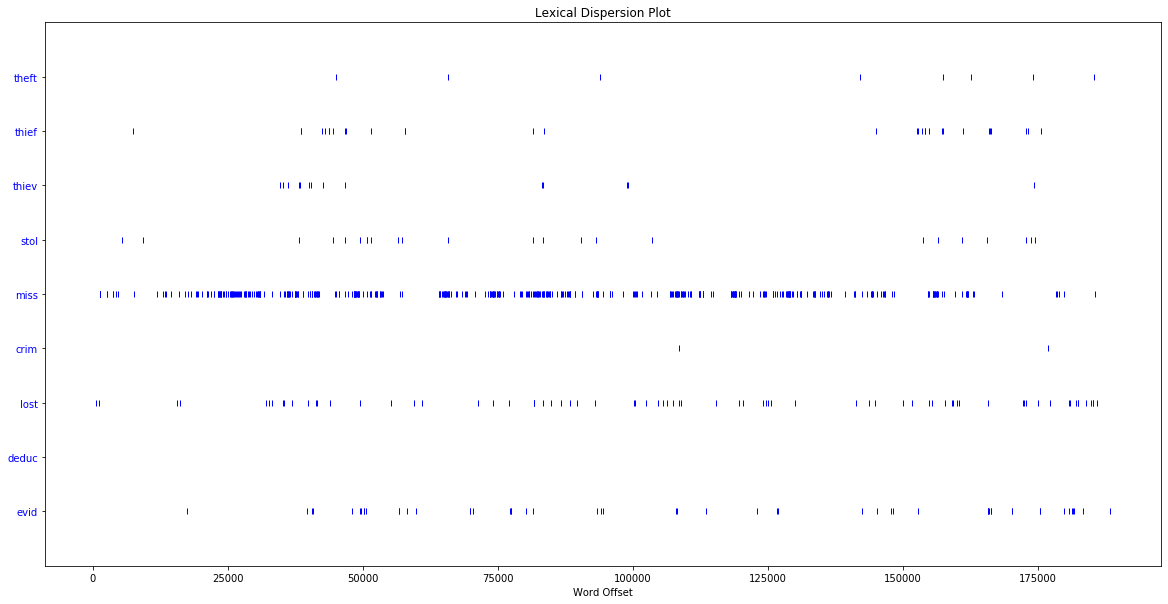

In [14]:
# Stemming experiment

lancasterStemmer = nltk.stem.lancaster.LancasterStemmer()

stemmedMoonstoneSoFarTokens = [lancasterStemmer.stem(token) for token in moonstoneSoFarTokens]
stemmedMoonstoneSoFarText = nltk.Text(stemmedMoonstoneSoFarTokens, name="Moonstone so far - stemmed")
stemmedMoonstoneSoFarText.dispersion_plot(['theft','thief','thiev','stol','miss','crim','lost','deduc','evid'])


This obviously requires a bit more thought - missing with the lancaster stemmer changes to miss, and of course miss is used a lot for Miss. Rachel. 

### 6. Write a program to determine whose name appears in the most number of paragraphs with the lemmas "moonstone" and "diamond." Then, in a markdown cell, describe anything you might notice about your results. 

Here's one way you might do this: 
 - Make a list of all names we've encountered in the novel so far. (Be careful to include both "Rachel" and "Miss Verinder," for instance.) 
 - Break the novel into paragraphs by splitting on double line breaks (`\n\n`). 
 - Tokenize each paragraph. 
 - Test for the presence of a word using the `in` keyword for lists. 
 - Maintain a dictionary for each character, where the key is the character's name, and the value is a tally of how many times their name has appeared in the same paragraph as "moonstone" and "diamond." 

In [15]:
# Enter code here. 
names = ['franklin', 'miss verinder', 'rachel', 'my lady', 'julia',
         'lady verinder', 'jennings', 'godfrey', 'cuff', 
         'bruff', 'murthwaite', 'candy','seegrave', 'spearman','rosanna', 
         'penelope', 'luker', 'clack', 'betteredge','lucy', 'merridew', 
         'samuel', 'mr. blake','selina', 'nancy','colonel', 'crusoe','sergeant']

# Initialise counter dictionary
namesCounter = { n: 0 for n in names }

moonstone = open('../Readings/Content/texts/moonstone.md', encoding="utf8").read()
moonstoneParagraphs = moonstone.split('\n\n')
for paragraph in moonstoneParagraphs:
    lowerParagraph = paragraph.lower()
    for name in names:
        # I haven't tokenised these paragraphs, I've just used *in* to check to see if the string is in the paragraph
        if name in lowerParagraph and ('moonstone' in lowerParagraph or 'diamond' in lowerParagraph):
            namesCounter[name] = namesCounter[name] + 1
            
# Sorted dictionary by value - this makes sense to me, but it still feels a bit unwieldy!  
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
sortedNamesCounter = { name: count for name, count in sorted(namesCounter.items(), key=lambda item: item[1], reverse=True)}

print('Name' + 38 * ' ' + 'Count of appearences')
for name, count in sortedNamesCounter.items():
    print(name.title() + (50 - len(name)) * ' ' + str(count))

    



Name                                      Count of appearences
Franklin                                          83
Rachel                                            68
Betteredge                                        45
Sergeant                                          44
My Lady                                           32
Bruff                                             30
Godfrey                                           29
Colonel                                           28
Miss Verinder                                     27
Rosanna                                           27
Luker                                             27
Cuff                                              21
Spearman                                          19
Penelope                                          18
Murthwaite                                        14
Lady Verinder                                     10
Jennings                                          9
Candy                                

Firstly, I didn't tokenize the paragraphs, I just used *in* with the strings. I think this should be ok and produce the same results as using *in* with an array of tokens. I *did* lowercase the paragraph to make it easier to check for moonstone & diamond. I didn't think I needed to do any stemming on these words. 

Secondly, I did a simple counter, so that Rachel and Miss Verinder (for example) are counted separately. I could do a more advanced version where each of the different names for the character are counted and then summed. 

Mr. Blake is a bit ambiguous as it covers Mr. Blake senior as well as Franklin - however, it comes up with a zero count, so no worries there.

If you add Rachel and Miss Verinder you get 95 counts which takes it into the lead. It's a bit tricky about Betteredge too as his narration takes up a large chunk of the book and I don't think he refers to himself very often.



### Bonus: Write a program to determine the words that occur more often in sentences ending in exclamation marks. In a markdown cell, describe anything you notice in your results. 

Here's one way you might do this: 

 - Sentence-tokenize the novel.
 - Make two empty lists, one for exclamation-mark sentences, and one for other sentences. 
 - Write a `for` loop to go through each sentence, and append it to one of the two lists, depending on whether it contains an exclamation mark.
 - Join the lists together, using `" ".join(list)`, so that they're easier to word-tokenize. 
 - Word-tokenize each string. 
 - Make `Counter()` objects for the resulting list of word-tokens. 
 - Subtract one set of numbers from the other, to find the words that occur much more in one category than another. 
 - Sort the results using `sorted()`, according to the difference in frequencies between the two.

In [16]:
# Enter code here. 


# Sentence-tokenize the novel.
moonstone = open('../Readings/Content/texts/moonstone.md', encoding="utf8").read()
sentences = nltk.sent_tokenize(moonstone) # 9876 sentences

# Make two empty lists, one for exclamation-mark sentences, and one for other sentences.
exclamationSentences = []
nonExclamationSentences = []

# Write a for loop to go through each sentence, and append it to one of the two lists, depending on whether it contains an exclamation mark.
for sentence in sentences:
    if '!' in sentence:
        exclamationSentences.append(sentence)
    else:
        nonExclamationSentences.append(sentence)
    
    
print(f"Number of sentences with ! {len(exclamationSentences)}\n")
print(f"Number of sentences without ! {len(nonExclamationSentences)}\n")
  
# Join the lists together, using " ".join(list), so that they're easier to word-tokenize.
exclamationString = " ".join(exclamationSentences)
nonExclamationString = " ".join(nonExclamationSentences)

# Remove punctuation to give us normal words and lower case them too
exclamationString = removePunctuation(exclamationString).lower()
nonExclamationString = removePunctuation(nonExclamationString).lower()

# Word-tokenize each string.
exclamationTokens = nltk.word_tokenize(exclamationString)
nonExclamationTokens = nltk.word_tokenize(nonExclamationString)

# Make Counter() objects for the resulting list of word-tokens.
exclamationCounter = collections.Counter(exclamationTokens)
nonExclamationCounter = collections.Counter(nonExclamationTokens)

#  Subtract one set of numbers from the other, to find the words that occur much more in one category than another.
differencesMainlyExclamation = exclamationCounter - nonExclamationCounter
differencesMainlyNotExclamation = nonExclamationCounter - exclamationCounter

print(f"*oh* appears in the exclamation sentences a total of: {exclamationCounter['oh']} times")
print(f"*oh* appears in the non exclamation sentences a total of: {nonExclamationCounter['oh']} times")



# Sort the results using sorted(), according to the difference in frequencies between the two
mostCommonWords = differencesMainlyExclamation.most_common(10)
leastCommonWords = differencesMainlyNotExclamation.most_common(10)

print('\n10 most common words in sentences with exclamation marks versus without\n')
for tupleCount in mostCommonWords:
    formatOutput(tupleCount[0], tupleCount[1])

print('\n10 most common words in sentences without exclamation marks versus with\n')
for tupleCount in leastCommonWords:
    formatOutput(tupleCount[0], tupleCount[1])




Number of sentences with ! 951

Number of sentences without ! 8925

*oh* appears in the exclamation sentences a total of: 58 times
*oh* appears in the non exclamation sentences a total of: 10 times

10 most common words in sentences with exclamation marks versus without

48 oh
16 exclaimed
15 ah
12 alas
11 cried
9 bless
7 thump
6 shouted
5 lord
4 hullo

10 most common words in sentences without exclamation marks versus with

10444 the
5960 to
4757 of
4711 i
3882 and
3542 in
2853 a
2239 that
2163 my
2029 was


As you might expect, exclamations appear most in the sentences with exclamation marks! Exclaim, shout, cried, alas all fit in there.

I've also done a sanity count check for 'oh' to see what the counts are in each list:

It appears 58 times in the exclamation list but only 10 times in the non-exclamation list - giving us the difference of 48.